## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [196]:
import psycopg2

import pandas as pd
import numpy as np
from scipy.stats import mode

import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
connection = psycopg2.connect(user='readonly',
                              password='6hajV34RTQfmxhS',
                              host='dsstudents.skillbox.ru',
                              port='5432',
                              database='db_ds_students')
sql = "SELECT * FROM exploratory;"
df = pd.read_sql(sql, connection).astype('float64')

In [172]:
# Посмотрим общую информацию о датасете

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664


In [173]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   feature_3  100 non-null    float64
 3   feature_4  100 non-null    float64
 4   feature_5  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB
None


In [175]:
features_list = df.columns.to_list()

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

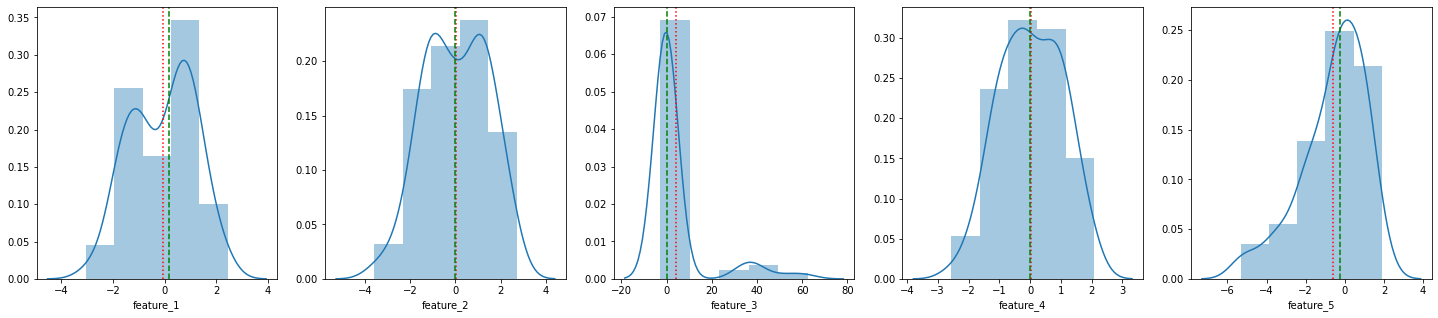

In [198]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for feature, ax in zip(features_list, axes.ravel()):
    sns.distplot(df[feature], bins=5, ax=ax)
    ax.axvline(df[feature].mean(), c='r', ls=':')
    ax.axvline(df[feature].median(), c='g', ls='--')

plt.show()

---
Все даиаграммы распределения асимметричны: `feature_3` имеет наибольший и положительный коэффициент асимметрии, остальные распределения имеют отрицательные коэффициенты асимметрии.

Распределения 1, 2 и 3 бимодальны.

`feature_1` - от 0 до 1 расположено больше трети всех данных, чуть меньше трети - от -2 до -1, что даёт вторую моду.

`feature_2` - от -1 до 1 расположено примерно 50 % данных.

`feature_3` - более 90 % данных расположено в интервале от 0 до 10.

`feature_4` - почти 2/3 данных расположены от -1 до 1.

`feature_5` - около 1/3 данных расположены от -1 до 1.


---

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

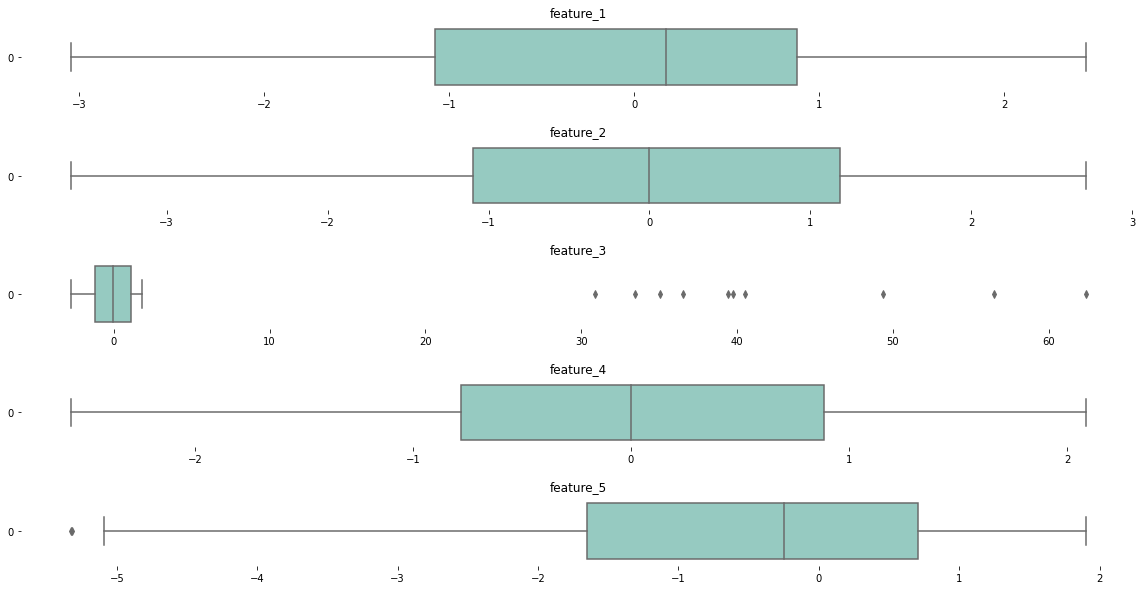

In [169]:
fig, axes = plt.subplots(5, 1, figsize=(20, 10), gridspec_kw={'hspace': 0.7})
for feature, ax in zip(features_list, axes.ravel()):
    sns.boxplot(data=df[feature], orient='h', ax=ax, palette='Set3')
    ax.set_frame_on(False)
    ax.set_title(feature)
plt.show()

***

Явные выбросы имеются у `feature_3`, а также у `feature_5`.

Наиболее близкие к нормальному распределения имеют `feature_1` и `feature_2`.

***

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

In [155]:
new_features_list = ['feature_1', 'feature_2', 'feature_3', 'feature_5']

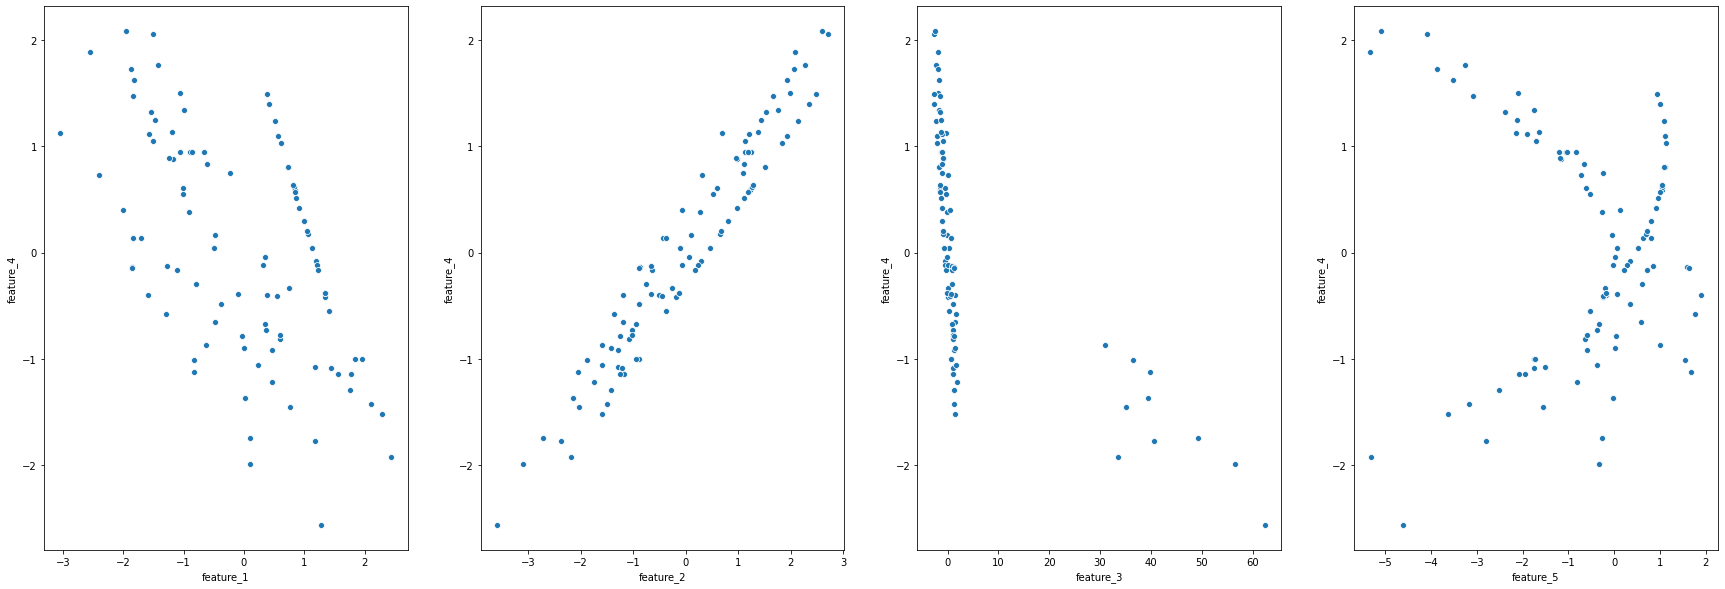

In [161]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))

for feature, ax in zip(new_features_list, axes):
    sns.scatterplot(df[feature], df.feature_4, ax=ax)
    
plt.show()

---

Линейная зависимость наблюдается с `feature_1` и `feature_2`.

С `feature_3` в области значений до 15 также есть чёткая линейная зависимость, однако присутствующие выбросы внесут ошибку в регрессионную модель.

С `feature_5` линейной зависимости нет.